# IMAGE CLASSIFICATION (Dog VS Cat)

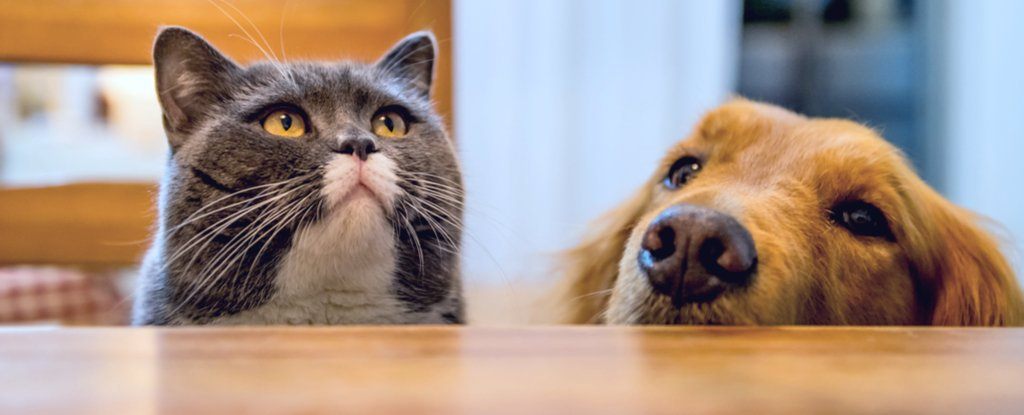

Download data at https://www.kaggle.com/c/dogs-vs-cats

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/vijay/Desktop/Studies/Data world/github/keras/Data/DogVsCat/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/home/vijay/Desktop/Studies/Data world/github/keras/Data/DogVsCat/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
classifier.fit_generator(training_set,
                         steps_per_epoch = (8000/32),
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps =( 2000/32))

Epoch 1/50
250/250 [==============================] - 45s 179ms/step - loss: 0.6851 - acc: 0.5511 - val_loss: 0.6468 - val_acc: 0.6465
Epoch 2/50
250/250 [==============================] - 42s 167ms/step - loss: 0.6245 - acc: 0.6616 - val_loss: 0.5805 - val_acc: 0.7065
Epoch 3/50
250/250 [==============================] - 42s 168ms/step - loss: 0.5924 - acc: 0.6786 - val_loss: 0.5643 - val_acc: 0.7120
Epoch 4/50
250/250 [==============================] - 42s 167ms/step - loss: 0.5625 - acc: 0.7091 - val_loss: 0.5497 - val_acc: 0.7355
Epoch 5/50
250/250 [==============================] - 43s 170ms/step - loss: 0.5356 - acc: 0.7296 - val_loss: 0.6094 - val_acc: 0.6855
Epoch 6/50
250/250 [==============================] - 42s 166ms/step - loss: 0.5153 - acc: 0.7471 - val_loss: 0.5106 - val_acc: 0.7635
Epoch 7/50
250/250 [==============================] - 41s 166ms/step - loss: 0.4962 - acc: 0.7517 - val_loss: 0.4890 - val_acc: 0.7700
Epoch 8/50
250/250 [==============================] - 4

In [6]:
# serialize weights to HDF5
classifier.save_weights("DogVsCat.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
classifier.load_weights("DogVsCat.h5")
print("Loaded model from disk")

Loaded model from disk


In [10]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/home/vijay/Desktop/Studies/Data world/github/keras/Data/DogVsCat/single/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'


In [19]:
prediction

'cat'